<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_118_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 118: PCA - Eigenvectors and Eigenvalues




---

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|PCA - Eigenvectors and Eigenvalues|
|||
|**Class Description**|In this class, a student will learn to calculate Eigenvectors and Eigenvalues and rotate the original dataset onto the transformed axis.|
|||
|**Class**|C118|
|||
|**Class Time**|55 minutes|
|||
|**Goal**|Calculate Eigenvectors and Eigenvalues|
||Transform the dataset based on Eigenvectors obtained|
||Visualise 1D and 2D projections|
||Compare manual PCA with `sklearn` PCA|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

#### Teacher-Student Activities

In the previous class, we understood few more concepts of vectors that are vital in PCA. We also learned how eigenvectors and eigenvalues form the basis for PCA projection.

In today's class, we will learn how to calculate eigenvectors and eigenvalues. We will also execute PCA manually using eigenvectors and compare their results with `sklearn` PCA.

Before that, let us go through the concepts covered in the previous class and begin the class from the topic: **Activity 1: Understanding Eigenvectors and Eigenvalues**.

---

#### Recap

#### Loading the Dataset

**Dataset Link:**  https://s3-whjr-curriculum-uploads.whjr.online/be99ea2b-cb07-4e52-b9ee-4c7e893ae48d.csv



In [ ]:
# Import the Python modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read the dataset
wheat_df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/52e55558-5ad7-4f93-a854-8186f415bc55.csv')
wheat_df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
# Rename the columns for better understandability
wheat_df.rename(columns = {'A': 'area', 'P': 'perimeter', 'C': 'compactness',
                            'LK': 'kernel_length', 'WK': 'kernel_width',
                            'A_Coef': 'asymmetry_coefficient', 'LKG':'kernel_groove_length'}, inplace = True)
wheat_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
wheat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


---

#### Exploratory Data Analysis

1. Analysis of data where kernel width is more than kernel length.
2. Check for anomalies in kernel groove length and kernel length.
3. Calculating compactness using area and perimeter.

$Compactness = \frac{4*Π*Area}{Circumference^2}$


In [ ]:
# Check for anomalies in 'kernel_width' and 'kernel_length'.
wheat_df[wheat_df['kernel_width'] > wheat_df['kernel_length']]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target


In [ ]:
# Check for anomalies in kernel_groove_length and kernel_length.
print("Number of rows having kernel groove length > kernel length =",
      wheat_df[wheat_df['kernel_groove_length'] > wheat_df['kernel_length']].shape[0], "\n") # You can add this code part later.

wheat_df[wheat_df['kernel_groove_length'] > wheat_df['kernel_length']] # Write only this part of code first. Then add the preceding part later.

Number of rows having kernel groove length > kernel length = 15 



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,1
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,1
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,1
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200,1
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,1
139,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,1
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307,2
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,2


In [ ]:
# Obtain a clean DataFrame
clean_df = wheat_df[wheat_df['kernel_groove_length'] < wheat_df['kernel_length']]
clean_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Create a duplicate copy of the 'clean_df' DataFrame
validation_df = clean_df.copy()
validation_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
# Calculate the compactness value using the given formula
import math
validation_df['compactness_formula'] = (validation_df['area'] * 4 * (math.pi)) / (validation_df['perimeter'] ** 2)
validation_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0.870756
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0.880833
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0.904524
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0.894995
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0.902631
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2,0.879156
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,0.850664
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2,0.888960
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2,0.852621


In [ ]:
# Check for anomalies in 'compactness' feature
validation_df[validation_df['compactness'] - validation_df['compactness_formula'] > 0.01]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula


---

#### Scaling Dataset Using `StandardScaler`

Scaling data is required to change the numeric values into a scale of data, without distorting differences in the ranges of values or losing information.


In [ ]:
# Create a DataFrame having only feature variables
wheat_features = clean_df.drop(['target'], axis = 1)
wheat_features.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
# Normalise the column values.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_values = standard_scaler.fit_transform(wheat_features)
wheat_scaled = pd.DataFrame(scaled_values)
wheat_scaled.columns = wheat_features.columns
wheat_scaled.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,0.137294,0.211526,-0.012130,0.307200,0.129752,-0.964557,-0.343965
1,0.005179,0.002040,0.413828,-0.169903,0.185749,-1.762019,-0.887953
2,-0.199947,-0.370380,1.421788,-0.770278,0.196415,-0.647693,-1.157887
3,-0.356398,-0.486762,1.021134,-0.694946,0.308408,-0.939367,-1.199098
4,0.443244,0.327907,1.354309,0.067507,0.796380,-1.538624,-0.436690


---

#### The Recipe of PCA

As you might have understood so far, PCA is all about finding Principal Components for which the steps are as follows:


<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c64fbd2d-4017-490a-a568-ad557a3eac30.png </center>


---

#### Covariance

**Covariance** is a statistical parameter that indicates the relationship between two features (or variables).
 - If an increase in one variable results in an increase in the other variable, then both the variables are said to have **positive** covariance.
 - If an increase or decrease in one variable results in an opposite change in the other variable, then both the variables are said to have a **negative** covariance.

Now, you might be wondering if this sounds exactly  like **correlation**. Well, not entirely. We will soon find out. Till then, to get a better understanding of both covariances, let's look at their mathematical formula.

Let $x_1$ and $x_2$ be two different features of a DataFrame. Then, mathematically, **covariance** is defined as

\begin{align}
\text{cov}(x_1, x_2) = \frac{1}{N}\sum_{i = 1} ^N (x_{1i} - \bar x_1)(x_{2i} - \bar x_2)
\end{align}

Where,

- $\bar x_1$ is the mean value of feature $x_1$
- $\bar x_2$ is the mean value of feature $x_2$
- $N$ is the total number of samples in a DataFrame
- $i$ is one of the samples in a DataFrame




---

#### Dot Product of Vectors and its Matrix Representation


Mathematically the **dot product** of two vectors $\vec a$ and $\vec b$ is defined as:

\begin{equation}
\vec a . \vec b = |\vec a| |\vec b| \text{cos} \space \theta
\tag{3.1}
\end{equation}

Where, $\theta$ is the angle between vectors $\vec a$ and $\vec b$. The result of this dot product is a scalar value. Hence, it is also commonly known as **scalar product** or **inner product** of two vectors.

**Dot product in matrix notation:**


Let us represent the vectors $\vec{a}$ and $\vec{b}$ in matrix form as follows:

\begin{matrix}  
{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ \vdots \\ a_n \end{bmatrix}_{n \times 1} &
{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n \end{bmatrix}_{n \times 1}
\end{matrix}  

The dot product of $\vec{a}$ and $\vec{b}$ can also be calculated as:


\begin{equation}
\vec a . \vec b = [(a_1 b_1) + (a_2 b_2) + (a_3 b_3) + \dots + (a_n b_n)]
\tag{3.2}
\end{equation}

If we try to multiply the above two vectors $\vec{a}$ and $\vec{b}$ using matrix multiplication, their product will not be defined. This is because, as per the rules of matrix multiplication, the number of columns of the first matrix must match the number of rows of the second matrix.

To rectify this problem, we can take transpose of the first matrix, turning it into a $1 n$ row matrix as follows:

\begin{matrix}  
a^T = \begin{bmatrix} a_1 & a_2 & a_3 & \cdots & a_n \end{bmatrix}_{1 \times n} &&
{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n \end{bmatrix}_{n \times 1}
\end{matrix}  

After taking transpose of $\vec{a}$, the product of vectors $\vec{a}$ and $\vec{b}$ is now well-defined as the number of columns of $\vec{a}$ is now equal to the number of rows of  $\vec{b}$ .


\begin{align}  
a^Tb &= \begin{bmatrix} a_1 & a_2 & a_3 & \cdots & a_n \end{bmatrix} \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n \end{bmatrix} \\
&= [(a_1 b_1) + (a_2 b_2) + (a_3 b_3) + \dots + (a_n b_n)]
\end{align}  

You may observe that the result of  above matrix multiplication $a^Tb$ is equivalent to the dot product of $\vec{a} . \vec{b}$ (Equation $3.2$).

Thus,
\begin{equation}
\boxed{\vec a . \vec b = a^Tb}
\tag{3.3}
\end{equation}

In Python, we can obtain dot product of two vectors or matrices using `dot()` function of `numpy` module.







---

#### Projection of Vectors

Let's say we have two vectors $\vec u$ and $\vec v$ and the vector $\vec u$ makes an angle $\theta$ with respect to vector $\vec v$ as shown in image below:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/a59e9078-e6ed-4aad-b39c-f11f9dd821d0.png width = 700></center>

Imagine a light source, parallel to $\vec v$ , above $\vec u$. The light would cast rays perpendicular or orthogonal to $\vec v$.

$g$ is the shadow cast by $\vec u$ on $\vec v$. This shadow vector is known as the **projection** of vector $\vec u$ on vector $\vec v$.

 The line segment $g$ indicates the magnitude or length of this shadow vector and is also known as the **projection** of $\vec u$ on $\vec v$ or $\text{proj}_\vec{v} \vec {u}$. Let us determine the value  of $g$.

**Projection  of $\vec u$ on $\vec v$:**

We know that as per the trigonometry ratios of an angle $θ$  in a right-angled triangle:

\begin{align}
\text{cos} \space \theta &= \frac{\text {Base}}{\text {Hypotenuse}}
\end{align}

In the above image,
- $\text{Base} = g$
- $\text{Hypotenuse} = |\vec {u}|$

Therefore,

\begin{align}
\text{cos} \space \theta &= \frac{\text {g}}{|\vec {u}|}
\end{align}

This can be rewritten as:
\begin{align}
\text {g} &= |\vec {u}| \text{cos} \space \theta \\
\tag{4.1}
\end{align}

Recall the dot product formula of two vectors (equation $(3.1)$):

\begin{align}
\vec u . \vec v &= |\vec u| |\vec v| \text{cos} \space \theta \\
\Rightarrow
\text{cos} \space \theta &= \frac{\vec u . \vec v }{|\vec u| |\vec v|}
\tag{4.2}
\end{align}

Let us substitute this value of   $\text{cos} \space \theta$ in the equation $(4.1)$.

\begin{align}
\text {g} &= |\vec {u}| \times  \frac{\vec u . \vec v }{|\vec u| |\vec v|} \\
&= \frac{\vec u . \vec v }{|\vec v|} \\
\end{align}

Thus, the formula for calculating the projection of vector $\vec u$ onto another vector $\vec v$ is:

\begin{equation}
\boxed{\text{proj}_{\vec{v} \vec {u}} = \frac{\vec u . \vec v }{|\vec v|}}
\tag{4.3}
\end{equation}


Now that we have explored all the necessary concepts needed to understand the working of PCA, let us now learn how to determine the desired principal components or vectors mathematically.




---

#### Maximising  Variance

Given the set of observations ${x_i}$  in a $d$-dimensional dataset where, $i = 1, 2, …, N$.

Our goal is to find the projection of $x_i$ onto a space with dimensions $k < d$ such that it gives maximum variance.

We’ll start by looking for a one-dimensional projection. We define a vector $u_1$ as the direction of the lower-dimensional space.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/4ebdf0ff-eafb-440d-b0e7-361f804bc732.jpg"/></center>

Since we are only interested in the direction of  this vector, we will consider $u_1$ to be a unit vector i.e. $|\vec u_1| = 1$.

The projection of a data vector $x_i$ onto
the unit vector $\vec u$ can be given as:
\begin{equation}
\text{proj}_\vec{u_1} \vec {x_i}=\frac{\vec u_1 . \vec x_i }{|\vec u_1|}
\tag{from equation 4.3 }
\end{equation}

As, $|\vec u_1| = 1$ and $\vec u_1 . \vec x_i = u_1^T.x$ (from equation $3.3$),

\begin{equation}
\text{proj}_\vec{u_1} \vec {x_i}= u_1^T.x_i
\tag{5.1}
\end{equation}

If $\bar{x}$ is the mean of the data observations $x_i$ in the original space, then the mean of $x_i$ in the projected space is given by:

\begin{equation}
\text{proj}_\vec{u_1} \bar {x}= u_1^T.\bar{x}
\tag{5.2}
\end{equation}

**Calculating variance:**

The variance of a dataset from its mean is calculated by finding the difference between each data value and the mean, squaring the differences and then finding the sum of all squared differences.

Thus, the variance of projections is given as:


\begin{align}
\text {var}(x_i) &= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[\text{proj}_\vec{u_1} \vec {x_i} - \text{proj}_\vec{u_1} \bar {x}\bigg]^2 \\
&= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[u_1^T.x_i - u_1^T.\bar{x}\bigg]^2 \\
&= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[u_1^T .(x_i - \bar{x})\bigg]^2 \\
&= \frac{1}{N} \sum\limits_{i = 1}^N \underbrace{\bigg[u_1^T . (x_i - \bar{x})\bigg]}_\text{1st term} \underbrace{\bigg[u_1^T . (x_i - \bar{x})\bigg]}_\text{2nd term} \\ \\
\end{align}

The $2^{nd}$ term in the above equation can also be written as : $\bigg[u_1. (x_i - \bar{x})^T\bigg]$ as both $u_1$ and $(x_i - \bar{x})$ are vectors and their dot product will be same no matter in whichever order we take transpose i.e.

$\bigg[u_1^T. (x_i - \bar{x})\bigg] \equiv \bigg[u_1. (x_i - \bar{x})^T\bigg]$

Thus,

\begin{align}
\text {var}(x_i) &= \frac{1}{N} \sum\limits_{i = 1}^N \bigg[u_1^T . (x_i - \bar{x})\bigg]\bigg[u_1 . (x_i - \bar{x})^T\bigg] \\
&= u_1^T. u_1.\frac{1}{N} \sum\limits_{i = 1}^N \bigg[(x_i - \bar{x}).(x_i - \bar{x})^T \bigg] \\
&= u_1^T. S. u_1 \\
\end{align}

Where, $S$ is the  covariance matrix of the observed data in the original high dimensional space.


$S = \frac{1}{N} \sum\limits_{i = 1}^N \bigg[(x_i - \bar{x}).(x_i - \bar{x})^T \bigg]$

**Note:** Such covariance matrix is known as **closed form of covariance matrix**. We will not explore this in much detail.

Thus,
\begin{align}
\text {var}(x_i) = u_1^T. S. u_1
\end{align}

Our goal is to obtain a vector $u_1$ such that it  maximises variance of projections i.e. $\text{var}(x_i)$ with the constraint $|u_1| = 1$ or $u_1^T. u_1 = 1$.

Thus, the maximisation function looks like this:

\begin{align}
\text{max} \space && u_1^T. S. u_1 \\
\text{subject to} \space && u_1^T. u_1 = 1
\end{align}

Such problems of constrained optimization can be solved easily using **Lagrangian multipliers**.
This technique says that if we need to maximise a function $f(x)$ subject to constraint $g(x)=c$, we introduce the Lagrange multiplier $\lambda$ and construct the Lagrangian $\mathcal{L}(x, \lambda)$:

$$\mathcal{L}(x, \lambda) = f(x) - \lambda (g(x) - c)$$

In our case,
- $f(x) = u_1^T. S. u_1$
- $g(x) = u_1^T. u_1$
- $c = 1$

Thus, our Lagrangian is:

$$\mathcal{L}(u_1, \lambda_1) = u_1^T. S. u_1 - \lambda_1 (u_1^T. u_1 - 1)$$

Taking partial derivative of above lagrangian function with respect to $u_1$,

\begin{align}
\frac{\partial \mathcal{L}}{\partial u_1} = 2.S.u_1 - 2 .\lambda_1. u_1
\end{align}

Equating the above equation to $0$, we get
\begin{align}
2.S.u_1 - 2 .\lambda_1. u_1 = 0 \\
S.u_1 - \lambda_1. u_1 = 0 \\
\boxed{S.u_1 = \lambda_1. u_1} \tag{5.3}
\end{align}

This desired vector $u_1$ is nothing but an **eigenvector** of the covariance matrix $S$, and the maximum variance is equal to the **eigenvalue** $\lambda_1$. This is good news because all you need to do is find eigenvectors having the largest eigenvalue and you will get your principal component or the desired dimension.

Similarly, we can obtain additional principal components  by choosing directions that maximise variance while being orthogonal to the existing ones.

Let us now understand the concept of Eigenvectors and Eigenvalues in detail and how to calculate them using Python.


---

#### Activity 1: Understanding Eigenvectors and Eigenvalues

Let us first understand linear transformations in 1D and 2D.

**Linear Transformation in 1D Data:**

Consider the following function having one dimension $x$:

 $$f(x) = 2x + 3$$

If $x = 2$, then $f(x) = 2 \times 2 + 3 = 7$

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/363834b6-1b34-44f1-a0fd-1733cd2ec392.png"/>  

`Fig: 1D Linear Transformation`</center>

Thus, the function $f(x)$ transforms $2$ to $7$.

**Linear Transformation in 2D Data:**

For 2D data, we use a transformation matrix to transform the data items.

For example, consider a vector $\vec v = (v_x, v_y)$.

\begin{matrix}  
\overbrace{\begin{bmatrix} 2 & 1 \\ 1.5 & 2 \end{bmatrix}}^A .
\overbrace{\begin{bmatrix} 0.75 \\ 0.25 \end{bmatrix}}^\vec v =
\overbrace{\begin{bmatrix} 1.75 \\ 1.625 \end{bmatrix}}^\vec b
\end{matrix}  


In the above equation, the transformation matrix $A$ transforms a vector $\vec v$ into another vector $\vec b$.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/dc32811f-248b-4cdf-b68a-fbc05ffa0be3.png"/>

`Fig: 2D Linear Transformation` </center>

In the graph below, we can see how matrix $A$ transformed the short vector $\vec v$ into the long vector $\vec b$.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/36b35ee8-7511-479f-a8e2-ef43eb045d7a.PNG"/></center>

In this transformation, both the magnitude (length) and the direction of the original vector is changed.


Consider the vector $(2,1)$ in the following graph:
<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/b9de4fc0-0934-4a0d-8bae-08a802e2a00a.png"/></center>

Here, the vector $(2, 1)$ is transformed into another vector $(4, 2)$. You may observe that the linear transformation changed the magnitude of original vector but the direction of both the vectors is still the same. Such special vectors are called **Eigenvectors**.


**What are Eigenvectors?**

- An Eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it.
- Eigenvectors satisfy the following equation:
$$Av = \lambda v$$
Where,
  -  $A$ is an $(n \times n)$ transformation matrix.
  - $v$ is the Eigenvector.
  - $\lambda$ is the magnitude of the scaled vector. It is also known as **Eigenvalue**.
  - Thus, $\vec v$ will become $A \vec v$ by simply stretching $\vec v$ in the same direction as shown in the image below.

    <img src ="https://s3-whjr-v2-prod-bucket.whjr.online/da8e7e35-ca3f-4422-b99f-3f5a35e44ed0.png"/>

**Eigenvectors and Eigenvalues in PCA:**

The eigenvectors and eigenvalues of a covariance matrix is the core of PCA:
- The eigenvectors (principal components) determine the directions of the new axis.
- The eigenvalues determine their magnitude (variance explained along the principal components).

In PCA, the original axis is rotated by some degree to obtain a new axis that shows the direction of maximum variance in the dataset.
<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/95a92a74-7087-4798-8dc7-dae1662f6468.png width='500'></center>

This new axis (green colour axis) which covers the maximum variance in the dataset is the first eigenvector or the **first principal component**.

The second Eigenvector or second principal component will be perpendicular or orthogonal to the first one (red colour axis). The reason the two eigenvectors are orthogonal to each other is because the Eigenvectors should be able to span the whole x-y area. As our dummy dataset had 2 dimensions, there will be 2 principal components or eigenvectors.

Thus, determining eigenvectors and eigenvalues will give us the desired new axis or the principal components. Let us now learn how to calculate Eigenvalues and Eigenvectors for our dummy dataset using Python.





---

#### Activity 2: Computing Eigenvalues and Eigenvectors

Let us compute the eigenvalues and eigenvectors of the scaled wheat kernel DataFrame `wheat_scaled` using `numpy` module. For this,
1. Import `linalg` module from `numpy` module.
2. Obtain the covariance matrix of scaled DataFrame using `cov()` function.
3. Pass this covariance matrix as input to `eig()` function of `linalg` module.

The `eig()` function returns the eigenvalues and eigenvectors of the corresponding covariance matrix.

In [ ]:
# S2.1: Compute eigenvalues and eigenvectors for scaled wheat kernel DataFrame
from numpy import linalg
# Compute covariance matrix
wheat_cov_matrix = wheat_scaled.cov()
# Use 'linalg.eig()' function to obtain eigenvectors and eigenvalues
wheat_eigenval, wheat_eigenvec = linalg.eig(wheat_cov_matrix)
print("Eigen Vectors: \n", wheat_eigenvec)
print("Eigen Values for corresponding eigenvector: ",wheat_eigenval)

Eigen Vectors: 
 [[ 0.44612962  0.01777889 -0.02352323  0.1844038   0.2060912  -0.73711055
  -0.42460409]
 [ 0.44340785  0.07649883  0.06297692  0.29095853  0.18540484  0.66804226
  -0.47776463]
 [ 0.27102541 -0.53923669 -0.62375265 -0.32767729 -0.33709953  0.07600323
  -0.14112643]
 [ 0.42466765  0.20113529  0.21736309  0.27156576 -0.76627656 -0.0428862
   0.26303672]
 [ 0.43383285 -0.12662086 -0.2104112   0.19993045  0.45888136  0.03741832
   0.70678067]
 [-0.0975078   0.71534547 -0.68477516  0.09083114 -0.03506532  0.00394929
  -0.01898959]
 [ 0.39094981  0.3672169   0.21442154 -0.8074624   0.10263492  0.03682577
   0.0494754 ]]
Eigen Values for corresponding eigenvector:  [5.02516274e+00 1.24421571e+00 6.82872292e-01 5.78625912e-02
 1.99059203e-02 8.37191350e-04 5.41298415e-03]


Observe the eigenvalues obtained in the output. As the original dataset had 7 dimensions, we obtained 7 eigenvalues ($\lambda_1$ to $\lambda_7$ ).

Please note that the `np.linalg.eig()` function lists the entries of the eigenvectors column wise.
Thus, the first column of the eigenvector array is the first principal component, second column is the second principal component and so on.

You can also take the transpose of the eigenvector array to obtain eigenvectors row-wise using `T` attribute.

In [ ]:
# S2.2: Take transpose of eigenvector array.
wheat_eigenvec_t = wheat_eigenvec.T
wheat_eigenvec_t

array([[ 0.44612962,  0.44340785,  0.27102541,  0.42466765,  0.43383285,
        -0.0975078 ,  0.39094981],
       [ 0.01777889,  0.07649883, -0.53923669,  0.20113529, -0.12662086,
         0.71534547,  0.3672169 ],
       [-0.02352323,  0.06297692, -0.62375265,  0.21736309, -0.2104112 ,
        -0.68477516,  0.21442154],
       [ 0.1844038 ,  0.29095853, -0.32767729,  0.27156576,  0.19993045,
         0.09083114, -0.8074624 ],
       [ 0.2060912 ,  0.18540484, -0.33709953, -0.76627656,  0.45888136,
        -0.03506532,  0.10263492],
       [-0.73711055,  0.66804226,  0.07600323, -0.0428862 ,  0.03741832,
         0.00394929,  0.03682577],
       [-0.42460409, -0.47776463, -0.14112643,  0.26303672,  0.70678067,
        -0.01898959,  0.0494754 ]])

Thus, in the above output, the first row indicates the first eigenvector or principal component coordinates for 7-dimensions, second row indicates the second eigenvector or principal component and so on.



**Choosing Top $k$ Eigenvectors:**


Recall that the typical goal of a PCA is to reduce the dimensionality of the original feature space.

From the above eigenvectors, we need to decide which eigenvector(s) can be dropped without losing too much information to obtain a lower-dimensional subspace. For this, we need to inspect the corresponding eigenvalues of these eigenvectors.

Let us rank the eigenvalues from highest to lowest to understand which eigenvalue bears the highest information (variance). This can be calculated in the following way:

Variance carried by first principal component:
\begin{align}
\frac{\lambda _1}{\lambda _1 + \lambda _2 + \lambda _3 + \lambda _4 + \lambda _5 + \lambda _6 + \lambda _7} = \frac{5.0252}{7.0362} = 0.71
\end{align}



Variance carried by second principal component:

\begin{align}
\frac{\lambda _2}{\lambda _1 + \lambda _2 + \lambda _3 + \lambda _4 + \lambda _5 + \lambda _6 + \lambda _7} = \frac{1.2442}{7.0362} = 0.18
\end{align}

Similarly, you can determine the amount of information or variance carried by each principal component by obtaining the ratio of variance (eigenvalue / total eigenvalues) i.e.

\begin{align}
\frac{\lambda _i}{\lambda _1 + \lambda _2 + ...+ \lambda _n}  
\end{align}
Where, $\lambda_i$ represents the eigenvalue for the corresponding $i^{th}$ eigenvector. This variance ratio is known as **Explained Variance**.

Let us obtain the explained variance of all 7 principal components by dividing each eigenvalue by the sum of all eigenvalues using Python.


In [ ]:
# S2.3: Obtain explained variance of all 7 PCs
explained_variance_ratio= np.round(wheat_eigenval / wheat_eigenval.sum(), 2)
print('Variance Explained: ', explained_variance_ratio)

Variance Explained:  [0.71 0.18 0.1  0.01 0.   0.   0.  ]


We can see here that the first principal component comprises 71% of the variation within the data, and thus, most of the information. With each subsequent component, less information is contributed to the compressed data.

Let us also plot the variance explained by each principal component on a bar plot.


Text(0.5, 0, 'Dimensions')

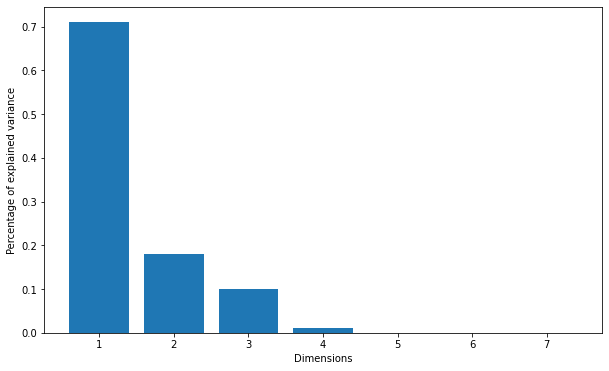

In [ ]:
# S2.4: Plot the variance explained by each PC
plt.figure(figsize = (10, 6))
plt.bar(range(1, explained_variance_ratio.shape[0] + 1), explained_variance_ratio)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

From the above plot, it is observed that:

- Most of the variance (approx $71\%$) can be explained by the first principal component alone.
- The second and third principal component still bears some information (approx $18\%$ and $10\%$ respectively).
- The other principal components can be safely dropped without losing too much information.

- Together, the first two principal components explain approx $89\%$ ($71\% + 18\%$ ) of the variance. Hence, if we reduce our 7-dimensional dataset into 2 dimensions, it would retain approx $89\%$ of the information.

- Together, the first three principal components explain approx $99\%$ ($71\% + 18\% + 10\%$ ) of the variance. Hence, if we reduce our 7-dimensional dataset into 3 dimensions, it would retain approx $99\%$ of the information.

Hence, based on how much information you want to retain in the transformed dataset, you can decide the number of dimensions to be reduced.

Recall the steps of PCA that we had studied in **"The Recipe of PCA"** section.

<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c64fbd2d-4017-490a-a568-ad557a3eac30.png> </center>


We have almost performed all the steps of PCA transformation. The last step  is to rotate our data to fit the transformed axis. But, *what will the coordinates of the rotated data be?* Let us find out.

---

#### Activity 3: Transformation to Original Dataset


Once we have found the eigenvectors,  we now convert our original data as per the new axis. This means that, we need to find out the coordinates of the data points when they are rotated to fit this new axis. To understand this, refer to the 3 graphs given in the image below:

<center>
<img src= "https://s3-whjr-v2-prod-bucket.whjr.online/298f99e0-dbd6-4ec8-bc61-99e9378266bf.png"/></center>

- The first graph illustrates the distribution of data along two features or dimensions.
- In the second graph, the data is centered and new axis or principal components are determined.
- In the third graph, the dimensions are now the new transformed axis i.e. `PC1` and `PC2` and the coordinates of the original data points are also transformed.


To rotate the original data onto the new axis, we will multiply the original scaled data by Eigenvectors as follows:

$$\text{Transformed Data = [Scaled Data].[Eigenvectors]}$$

Let us perform  dot multiplication of scaled dataset array with eigenvectors array.

Before that, first determine the number of rows and columns of both the arrays.


In [ ]:
# S3.1: Determine the shape of 'wheat_scaled' and 'wheat_eigenvec'
print("Shape of scaled dataset", wheat_scaled.shape)
print("Shape of eigenvector array", wheat_eigenvec.shape)

Shape of scaled dataset (194, 7)
Shape of eigenvector array (7, 7)


As the number of columns of first array `wheat_scaled` is equal to the number of rows of second array `wheat_eigenvec`, we can perform dot multiplication on both the arrays. Use `np.dot()` function to obtain the dot product of both the arrays.

In [ ]:
# S3.2: Obtain new coordinates of data points for the transformed axis.
wheat_transformed = np.dot(wheat_scaled, wheat_eigenvec)
wheat_transformed

array([[ 2.98083101e-01, -7.45778132e-01,  6.43882019e-01, ...,
        -1.05737851e-01,  1.43896828e-02,  1.61666205e-02],
       [-5.15302811e-02, -1.86712030e+00,  6.82057039e-01, ...,
         4.80248564e-02,  3.57578358e-03,  1.45453886e-02],
       [-4.99512480e-01, -1.86688915e+00, -9.18975513e-01, ...,
        -4.91246815e-03,  3.19929630e-03, -4.75758021e-02],
       ...,
       [-1.35909630e+00,  1.32872992e+00, -2.90736781e+00, ...,
        -2.14066181e-02,  3.32687392e-02,  9.40663816e-02],
       [-2.36063731e+00, -2.33122328e-02,  3.61868543e-01, ...,
         6.03246515e-02, -1.42776595e-02, -4.76914091e-02],
       [-1.94917894e+00,  5.82452191e-01, -1.02519434e+00, ...,
        -1.13217651e-01,  1.35771660e-03,  1.63789322e-02]])

Here, the final matrix produced is the matrix multiplication of `wheat_scaled` and `wheat_eigenvec` which is a `194 x 7` matrix.

Let us convert the above transformed matrix into a DataFrame and rename the columns.



In [ ]:
# Convert the array obtained after dot multiplication into a DataFrame.
wheat_transformed_df = pd.DataFrame(np.array(wheat_transformed),
                                    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
wheat_transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.298083,-0.745778,0.643882,0.390331,-0.105738,0.014390,0.016167
1,-0.051530,-1.867120,0.682057,0.413886,0.048025,0.003576,0.014545
2,-0.499512,-1.866889,-0.918976,0.095684,-0.004912,0.003199,-0.047576
3,-0.636595,-1.885336,-0.489012,0.213888,0.075991,0.008613,0.233470
4,1.063661,-2.045596,-0.027448,0.123776,0.018455,0.000014,0.052241
...,...,...,...,...,...,...,...
189,-2.021721,-0.799995,-0.522772,-0.174900,-0.082187,-0.020105,-0.019290
190,-2.741592,0.287564,0.034551,-0.209599,-0.031151,-0.034074,0.059019
191,-1.359096,1.328730,-2.907368,0.023246,-0.021407,0.033269,0.094066
192,-2.360637,-0.023312,0.361869,-0.178248,0.060325,-0.014278,-0.047691


You may observe that the above DataFrame obtained after dot multiplication has 194 rows and 7 columns. Each column represents the new coordinates of the 194 data points.
- First column represents the coordinates of 194 data points for first axis (PC1). So, if we need only 1 dimension, we will consider only first column of the above array.
- Similarly, the second column represents the coordinates of 194 data points for the second axis (PC2). So, if we need only 2 dimensions, we will consider only the first two columns of the above array and so on.

Hence, we have transformed our original dataset into a new feature space. Let us visualise the above transformed data.

---

#### Activity 4: PCA 1D projection

Suppose we need to transform our 7-dimensional dataset into 1 dimension. Hence, we would consider only the first column of the transformed matrix obtained after dot multiplication.

In [ ]:
# S4.1: Obtain the coordinates of the data points for PC1 axis.
pc_1d_manual = wheat_transformed_df.iloc[:, :1]
pc_1d_manual

,PC1
0,0.298083
1,-0.051530
2,-0.499512
3,-0.636595
4,1.063661
...,...
189,-2.021721
190,-2.741592
191,-1.359096
192,-2.360637


These are the coordinates values of 194 data points for the first axis. Let us visualise these new coordinates values by creating a line plot.

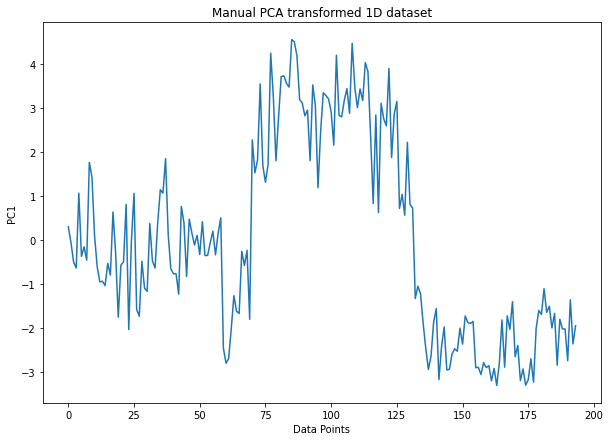

In [ ]:
# S4.2: Visualise 1D projection
plt.figure(figsize=(10, 7))
plt.plot(pc_1d_manual)
plt.title('Manual PCA transformed 1D dataset')
plt.xlabel('Data Points')
plt.ylabel('PC1')
plt.show()

Thus, we have reduced the dimensionality of our dataset to 1D by manually performing PCA. The explained variance for PC1 was `0.71`, which indicates that approx 71% of the original data is retained by PC1.

 Let us now perform PCA 1D projection using `sklearn` library and compare its results with manual PCA.

**Using `sklearn` PCA:**

We had already performed PCA using `sklearn` module in one of the previous classes. Let us recall the steps for the same.

1. Import `PCA` from `sklearn.decomposition` module.
2. Pass the number of components/dimensions to the PCA constructor using the following syntax:

  **Syntax of PCA:** `PCA(n_components = None)`

  Where, `n_components` is the number of components to keep. As we are projecting the dataset into  1 dimension, `n_components` would be `1` in this case.

3. Call the `fit_transform()` function on PCA object to obtain the new set of features or principal components.

In [ ]:
# S4.3: Transform dataset into 1D using sklearn PCA
from sklearn.decomposition import PCA
pca_1 = PCA(n_components = 1)
pca_1d_sklearn = pca_1.fit_transform(wheat_scaled)
pca_1d_sklearn

array([[ 0.2980831 ],
       [-0.05153028],
       [-0.49951248],
       [-0.63659541],
       [ 1.06366126],
       [-0.37340412],
       [-0.15324135],
       [-0.45739298],
       [ 1.76525944],
       [ 1.42547587],
       [ 0.08267765],
       [-0.61565262],
       [-0.94939055],
       [-0.93907419],
       [-1.03621835],
       [-0.53072559],
       [-0.7962988 ],
       [ 0.63651564],
       [-0.29258417],
       [-1.75315269],
       [-0.57186772],
       [-0.4992543 ],
       [ 0.8078508 ],
       [-2.03683253],
       [-0.02972505],
       [ 1.06053237],
       [-1.58004045],
       [-1.73180792],
       [-0.48316606],
       [-1.09486822],
       [-1.16664328],
       [ 0.37606012],
       [-0.47474278],
       [-0.63783552],
       [ 0.37713041],
       [ 1.1422534 ],
       [ 1.06455905],
       [ 1.84916305],
       [ 0.12841846],
       [-0.65292173],
       [-0.76552996],
       [-0.76799345],
       [-1.231523  ],
       [ 0.76278001],
       [ 0.39138233],
       [-0

Let us create a line plot to visualise the above PCA transformed 1D data.

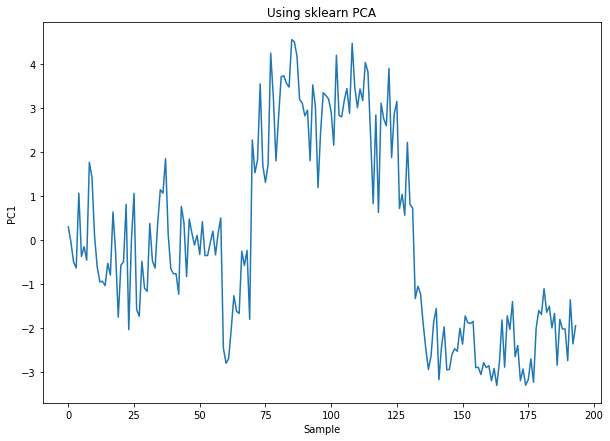

In [ ]:
# S4.4: Visualise sklearn PCA transformed data
plt.figure(figsize=(10, 7))
plt.plot(pca_1d_sklearn)
plt.title('Using sklearn PCA')
plt.xlabel('Sample')
plt.ylabel('PC1')
plt.show()

We can observe that the plot obtained using manual PCA and `sklearn` PCA are the same.

We can also obtain the eigenvectors, eigenvalues and total variance explained by each principal component using the `sklearn` PCA object. For this, use the following methods:

- `pca_object.components_`: To obtain eigenvectors or principal component axis.
- `pca_object.explained_variance_`: To obtain eigenvalues.
- `pca_object.explained_variance_ratio`: To obtain the total variance explained by each principal component.

In [ ]:
# S4.5: Print the eigenvectors, eigenvalues and total variance of sklearn PCA object
print("Eigenvectors:", pca_1.components_)
print("Eigenvalues:", pca_1.explained_variance_)
print("Total variance explained by first PC:", pca_1.explained_variance_ratio_)

Eigenvectors: [[ 0.44612962  0.44340785  0.27102541  0.42466765  0.43383285 -0.0975078
   0.39094981]]
Eigenvalues: [5.02516274]
Total variance explained by first PC: [0.71417998]


We can observe that the values obtained using `sklearn` module are the same as those obtained by using `eig()` function in **Activity 2: Computing Eigenvalues and Eigenvectors**.

Similarly, let us visualise 2D transformed data using manual and `sklearn` PCA.




---

#### Activity 5: PCA 2D projection


To reduce our 7-dimensional dataset into 2 dimensions, consider the first two columns of the transformed matrix obtained after dot multiplication.

In [ ]:
# S5.1: Obtain the coordinates of the data points for PC1 and PC2 axis
pc_2d_manual = wheat_transformed_df.iloc[:, :2]
pc_2d_manual

,PC1,PC2
0,0.298083,-0.745778
1,-0.051530,-1.867120
2,-0.499512,-1.866889
3,-0.636595,-1.885336
4,1.063661,-2.045596
...,...,...
189,-2.021721,-0.799995
190,-2.741592,0.287564
191,-1.359096,1.328730
192,-2.360637,-0.023312


These are the coordinates values of 194 data points for PC1 and PC2 axis. Let us visualise these new coordinates values by creating a scatter plot. Also, colour code the data points according to the `target` column of the original dataset `clean_df`.





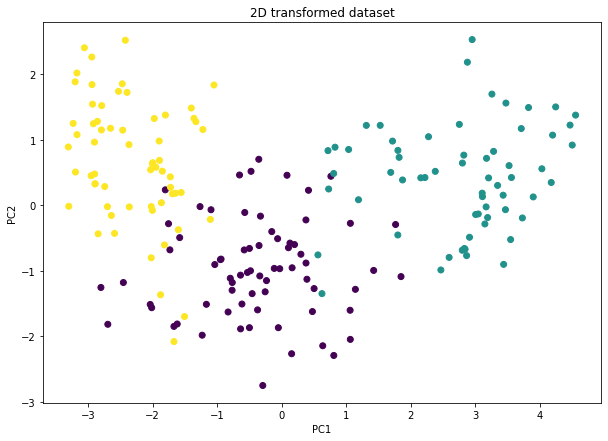

In [ ]:
# S5.2: Visualise 1D projection
plt.figure(figsize=(10, 7))
plt.scatter(pc_2d_manual['PC1'], pc_2d_manual['PC2'], c = clean_df['target'])
plt.title('2D transformed dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


 Let us now perform PCA 2D projection using `sklearn` library and compare its results with manual PCA.

In [ ]:
# S5.3: Transform dataset into 2D using sklearn PCA
from sklearn.decomposition import PCA
pca_2 = PCA(n_components = 2)
pca_2d_sklearn = pca_2.fit_transform(wheat_scaled)
pca_2d_sklearn

array([[ 0.2980831 ,  0.74577813],
       [-0.05153028,  1.8671203 ],
       [-0.49951248,  1.86688915],
       [-0.63659541,  1.88533626],
       [ 1.06366126,  2.04559645],
       [-0.37340412,  1.5952673 ],
       [-0.15324135,  0.3998879 ],
       [-0.45739298,  1.34735748],
       [ 1.76525944,  0.29185592],
       [ 1.42547587,  0.99302611],
       [ 0.08267765, -0.46000697],
       [-0.61565262,  1.50577477],
       [-0.94939055,  0.82789433],
       [-0.93907419,  0.81981468],
       [-1.03621835,  0.90328477],
       [-0.53072559,  1.02386397],
       [-0.7962988 ,  1.11234625],
       [ 0.63651564,  2.14305165],
       [-0.29258417,  2.74964278],
       [-1.75315269,  0.27961646],
       [-0.57186772,  0.10832004],
       [-0.4992543 ,  0.65686148],
       [ 0.8078508 ,  2.2910195 ],
       [-2.03683253,  1.51248838],
       [-0.02972505,  0.96659748],
       [ 1.06053237,  1.60097287],
       [-1.58004045,  0.49181958],
       [-1.73180792,  0.67893083],
       [-0.48316606,

Let us create a scatter plot to visualise the above PCA transformed 2D data.

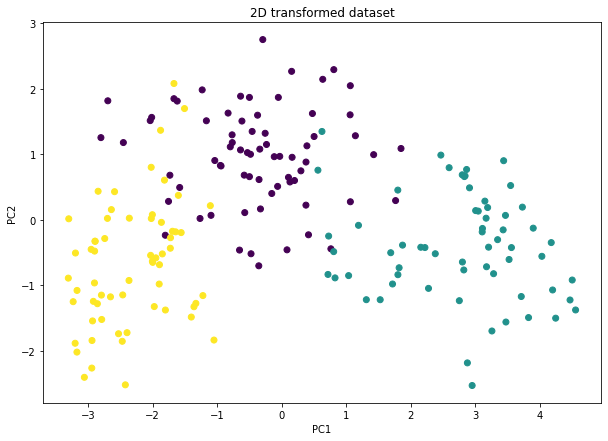

In [ ]:
# S5.4: Visualise sklearn PCA transformed data
plt.figure(figsize=(10, 7))
plt.scatter(pca_2d_sklearn[:,0], pca_2d_sklearn[:, 1], c = clean_df['target'])
plt.title('2D transformed dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

You may observe that the 2D scatter plots obtained using manual and sklearn PCA are not identical. Let us determine the eigenvectors, eigenvalues, and total variance explained by each principal component using `sklearn` module.

In [ ]:
# S5.5: Print the eigenvectors, eigenvalues and total variance of sklearn PCA object.
print("Eigenvectors:", pca_2.components_)
print("Eigenvalues:", pca_2.explained_variance_)
print("Total variance explained by first PC:", pca_2.explained_variance_ratio_)

Eigenvectors: [[ 0.44612962  0.44340785  0.27102541  0.42466765  0.43383285 -0.0975078
   0.39094981]
 [-0.01777889 -0.07649883  0.53923669 -0.20113529  0.12662086 -0.71534547
  -0.3672169 ]]
Eigenvalues: [5.02516274 1.24421571]
Total variance explained by first PC: [0.71417998 0.17682889]


If you compare the eigenvectors obtained using `eig()` function (**Activity 2: Computing Eigenvalues and Eigenvectors**) and using `components_` attribute, you may observe that the second principal component values (second row of eigenvectors array) for both manual and sklearn PCA are identical, but the signs are different. This is just a difference in convention, nothing meaningful. Also, note that the negative of eigenvectors is the same eigenvector.

Thus, we have reduced the dimensionality of the wheat kernel dataset using manual PCA, as well as the `sklearn` API.



We will stop here. In the next class, we will start exploring a new problem statement for PCA.

---

#### Activities


**Teacher Activities:**

1. PCA - Eigenvectors and Eigenvalues (Class Copy)

   Link on Panel
   
2. PCA - Eigenvectors and Eigenvalues (Reference)

    Link on Panel